In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Возьмите датасет Mortality and Water Hardness.
В этом датасете содержатся данные по средней годовой смертности на
100000 населения и концентрации кальция в питьевой воде для 61
большого города в Англии и Уэльсе. Города дополнительно поделены на
северные и южные.

Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [97]:
df = pd.read_csv('water.csv')

In [98]:
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


Построить точечный график:

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

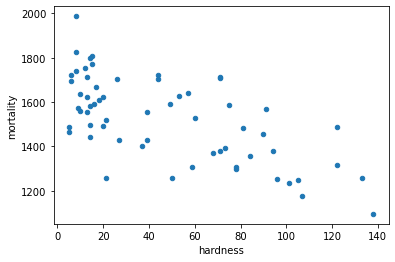

In [99]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [100]:
#на первый взгляд, наблюдается обратная зависимость - смертность выше в городах с низкой концентрацией кальция в питьевой воде

Рассчитать коэффициенты корреляции Пирсона и Спирмена

In [101]:
df[['hardness', 'mortality']].corr()  #коэффициент корреляции Пирсона

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [102]:
df[['hardness', 'mortality']].corr(method='spearman') #коэффициенты корреляции Спирмена

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [103]:
# на основе коэффициентов корреляции видим значимую обратную зависимость средней годовой смертности от жесткости воды 

Построить модель линейной регрессии:

In [104]:
X = df[['hardness']]
y = df['mortality']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [227]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [228]:
print('y = ', model.coef_[0], '* x + ', model.intercept_) 

y =  -2.646463874709342 * x +  1659.9588428720324


Рассчитать коэффициент детерминации:

In [229]:
model.score(X_test, y_test) # коэффициент детерминации. 

0.5266238900238247

In [230]:
y_pred = model.predict(X_test)

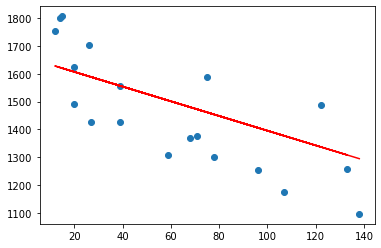

In [231]:
# иллюстрация модели
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

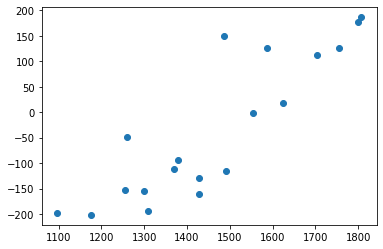

In [232]:
# график остатков
y_res = (y_test - y_pred)
plt.scatter(y_test, y_res)

остатки не выглядят хаотичными, прослеживается некая прямая зависимость

выводы: 

на основе графика и коэффициентов корреляции видим значимую обратную зависимость средней годовой смертности от жесткости воды 
по коэффициенту детерминации и графику остатков замечаем, что построенная модель линейной регрессии не очень хорошо "обьясняет" эту обратную зависимость

In [ ]:
# Разделим данные на 2 группы: север и юг и проделаем такой же анализ с каждой из них

In [38]:
df_south = df[df['location'] == 'South']
df_north = df[df['location'] == 'North']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

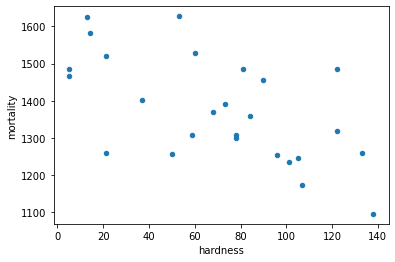

In [40]:
df_south.plot(kind='scatter', x='hardness', y='mortality')

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

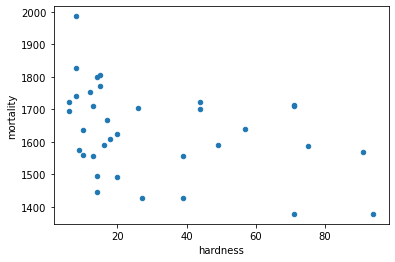

In [41]:
df_north.plot(kind='scatter', x='hardness', y='mortality')

In [42]:
df_south[['hardness', 'mortality']].corr() 

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [43]:
df_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [45]:
df_north[['hardness', 'mortality']].corr() 

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [46]:
df_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [63]:
X_south = df_south[['hardness']]
y_south = df_south['mortality']

In [237]:
X_train_south, X_test_south, y_train_south, y_test_south = train_test_split(X_south, y_south, test_size = 0.30)

In [238]:
model_south = LinearRegression()
model_south.fit(X_train_south, y_train_south) 

LinearRegression()

In [239]:
print('y = ', model_south.coef_[0], '* x + ', model_south.intercept_)

y =  -1.760053662120293 * x +  1506.7170121698025


In [240]:
model_south.score(X_test_south, y_test_south) # коэффициент детерминации. 

0.5919829125056639

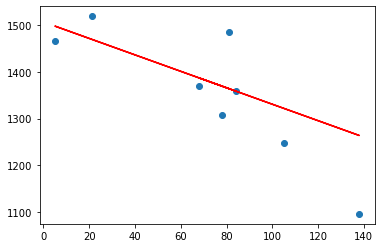

In [241]:
# иллюстрация модели
y_pred_south = model_south.predict(X_test_south)
plt.scatter(X_test_south, y_test_south)
plt.plot(X_test_south, y_pred_south, c='r')

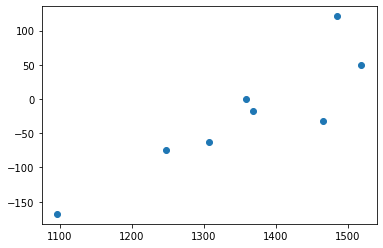

In [242]:
# график остатков
y_res_south = (y_test_south - y_pred_south)
plt.scatter(y_test_south, y_res_south)

In [72]:
X_north = df_north[['hardness']]
y_north = df_north['mortality']

In [251]:
X_train_north, X_test_north, y_train_north, y_test_north = train_test_split(X_north, y_north, test_size = 0.30)

In [252]:
model_north = LinearRegression()
model_north.fit(X_train_north, y_train_north) 

LinearRegression()

In [253]:
print('y = ', model_north.coef_[0], '* x + ', model_north.intercept_)

y =  -1.7407269233997702 * x +  1699.6908663576419


In [254]:
model_north.score(X_test_north, y_test_north) # коэффициент детерминации. 

0.08331368383149329

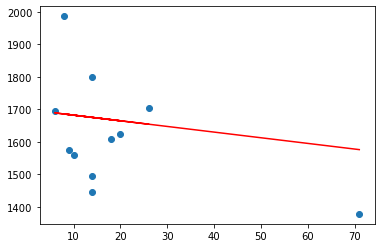

In [255]:
# иллюстрация модели
y_pred_north = model_north.predict(X_test_north)
plt.scatter(X_test_north, y_test_north)
plt.plot(X_test_north, y_pred_north, c='r')

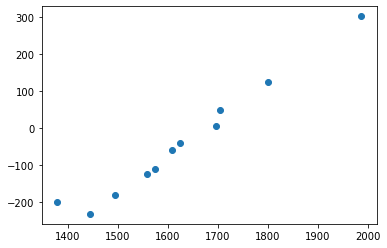

In [256]:
# график остатков
y_res_north = (y_test_north - y_pred_north)
plt.scatter(y_test_north, y_res_north)

выводы: 
видим, что для южных городов все примерно аналогично общей выборке. а вот на севере зависимости средней годовой смертности от жесткости воды не наблюдается